<a href="https://colab.research.google.com/github/hawkeyedatatsai/food-sales-predictions/blob/main/Heng_Tser_Tsai_Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

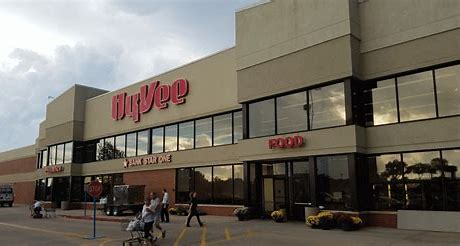

# **Food Sales Predictions**
##### Heng-Tser Tsai




---



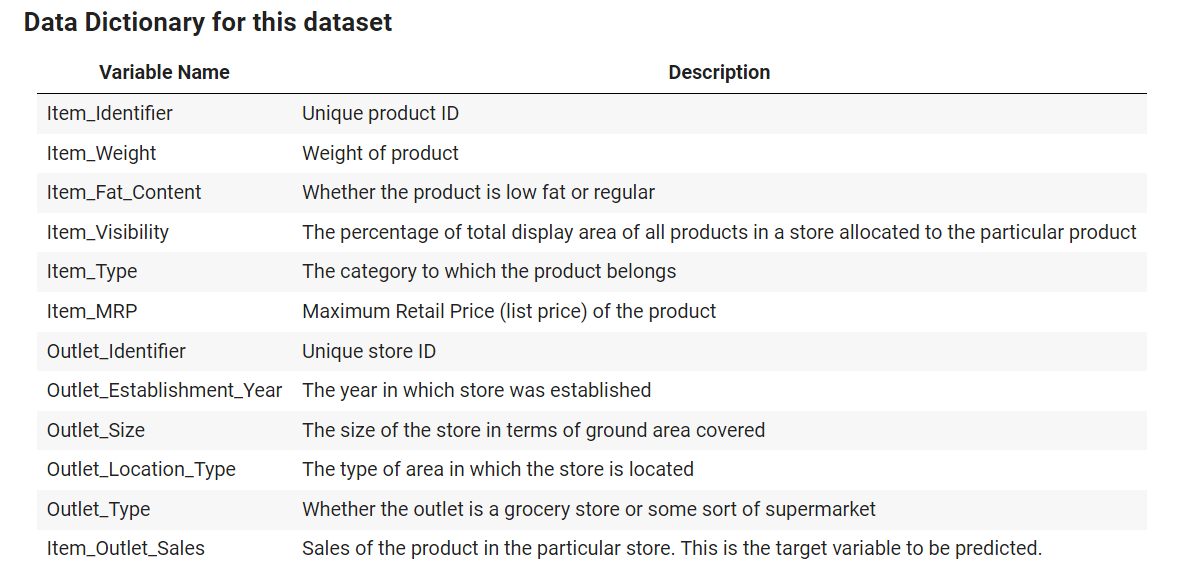

## Loading Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import StrMethodFormatter
price_fmt = StrMethodFormatter("₹{x:,.0f}")
filename = "/content/sales_predictions.csv"
df = pd.read_csv(filename)

In [ ]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning



###1. How many rows and columns

In [ ]:
df.shape

(8523, 12)

###2. What are the datatypes of each variable?

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###3. Are there duplicates? If so, drop any duplicates.


In [ ]:
df.duplicated().sum()

0

###4. Identify missing values.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

#### **1) Drop column?**

In [ ]:
df.isna().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- not going to drop columns, since these two columns carry 17% and 28% missing data, both < 50%.

In [ ]:
df.loc[:, 'Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

- std>4 confirm its not normal distributed and not going to drop.

#### **2) analysizing missing values on Item_Weight through either Item_Type or Item_Fat_Content.**

In [ ]:
#decided to start with Item_Type first 
#because it makes sense the weight is correspond with items AND
#there are probably more filters to apply between items and fat_content, 5:3, from df.head().
Item_weight_missing_values_filter = df['Item_Weight'].isna()
df[Item_weight_missing_values_filter][['Item_Weight', "Item_Type"]]
#finds out 1463 rows w/ missing Item_Weight

,Item_Weight,Item_Type
7,NaN,Snack Foods
18,NaN,Hard Drinks
21,NaN,Baking Goods
23,NaN,Baking Goods
29,NaN,Canned
...,...,...
8485,NaN,Soft Drinks
8487,NaN,Soft Drinks
8488,NaN,Others
8490,NaN,Fruits and Vegetables


In [ ]:
df['Item_Type'].describe()
#find out there are 16 unique item_types 

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [ ]:
# find the avg Item_Weight on Item_Type
df.groupby('Item_Type').mean()["Item_Weight"]

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [ ]:
#df['value'] = df['value'].fillna(df.groupby('name')['value'].transform('mean'))
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))
df[Item_weight_missing_values_filter][['Item_Weight', "Item_Type"]]

,Item_Weight,Item_Type
7,12.987880,Snack Foods
18,11.400328,Hard Drinks
21,12.277108,Baking Goods
23,12.277108,Baking Goods
29,12.305705,Canned
...,...,...
8485,11.847460,Soft Drinks
8487,11.847460,Soft Drinks
8488,13.853285,Others
8490,13.224769,Fruits and Vegetables


- fill missing values by mean within a group

In [ ]:
#option: maybe able to apply the same strategy from Item_Fat_Content
df.loc[:, 'Item_Fat_Content'].describe()

count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- confirm no more missing data on Item_Weight

#### **3) Looking on Outlet_Size, assuming size has to do with either outlet location or sales price.**

In [ ]:
#decide to go w/ sales price because they are ints
#find out how many NANs are
df['Outlet_Size'].value_counts(dropna = False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#apply similiar strategy from above to find each Outlet_Size avg Item_Outlet_Sales
df.groupby('Outlet_Size',dropna = False).mean()["Item_Outlet_Sales"]

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
NaN       1822.626947
Name: Item_Outlet_Sales, dtype: float64

- since the avg sales in NaN are close to Small, decide to fill NAN with Small 

In [ ]:
df['Outlet_Size'].fillna("Small", inplace=True)
df['Outlet_Size'].value_counts(dropna = False)

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- confirm no missing values on both columns now.

###6. Confirm that there are no missing values after addressing them.

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

###7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
#analysize unique dada on objects inlcuding Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Type
pd.unique(df["Outlet_Identifier"])

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [ ]:
pd.unique(df["Item_Identifier"])

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [ ]:
pd.unique(df["Item_Fat_Content"])

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
##df['Sex'] = df['Sex'].replace('F', 'female')
##df['Sex'].value_counts()
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat','LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
pd.unique(df["Outlet_Type"])

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
pd.unique(df["Item_Type"])

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
pd.unique(df["Outlet_Size"])

array(['Medium', 'Small', 'High'], dtype=object)

In [ ]:
pd.unique(df["Outlet_Location_Type"])

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
pd.unique(df["Outlet_Type"])

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

###8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

###1. Histogram to view the distributions of various features in your dataset.

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


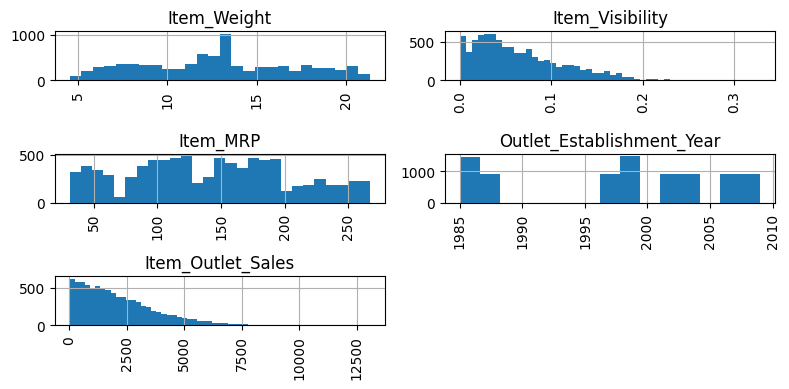

In [ ]:
df.hist(figsize=(8,4), xrot=90, bins="auto")
plt.tight_layout()
plt.show;

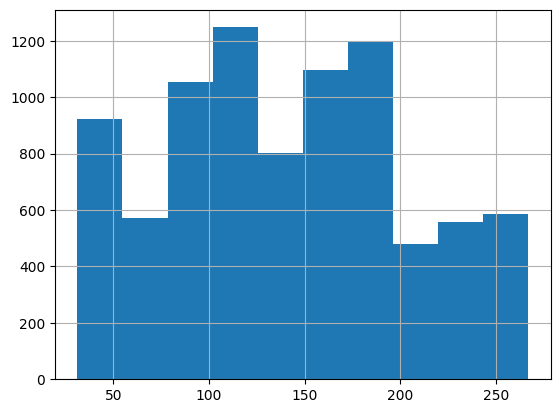

In [ ]:
ax = df['Item_MRP'].hist()

Text(0, 0.5, 'Number of Items')

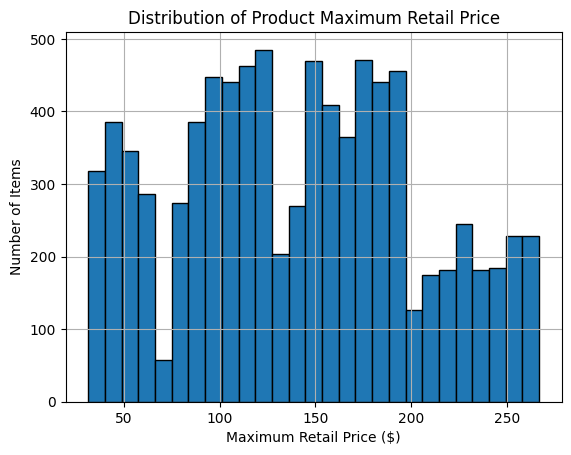

In [ ]:
ax = df['Item_MRP'].hist(bins = 'auto', edgecolor = 'black') 

#removing scientific notation from the x-axis
ax.ticklabel_format(style='plain')

#only rotate the x-axis, so "axis='x'" 
#rotation=45 (rotate the labels 45 degrees).
ax.tick_params(axis='x')

#add titles and labels
ax.set_title('Distribution of Product Maximum Retail Price')
ax.set_xlabel('Maximum Retail Price ($)')
ax.set_ylabel('Number of Items')

###2. Boxplot to view statistical summaries of various features in your dataset.

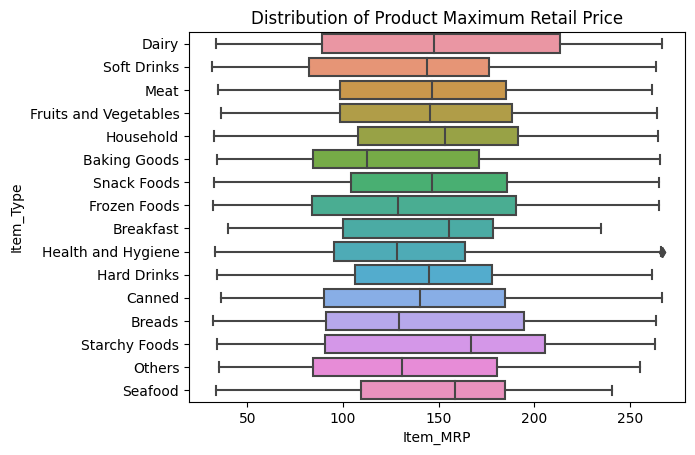

In [ ]:
ax = sns.boxplot(x='Item_MRP', y='Item_Type', data=df)
ax.set_title("Distribution of Product Maximum Retail Price");

###3. Heatmap of the correlation between features.

<Axes: >

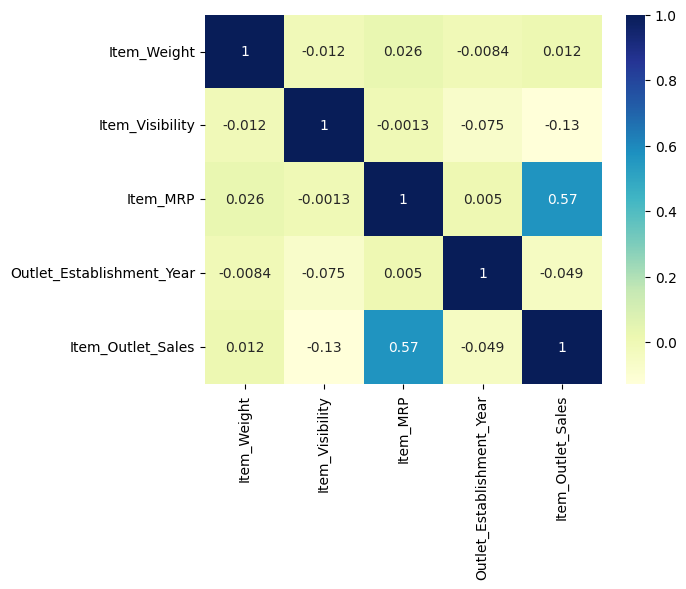

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot = True)

###4. using a different feature and try to create PLT and seaborn to compare and make multi subplots

####1). boxplot between Items sales in different size of outlets

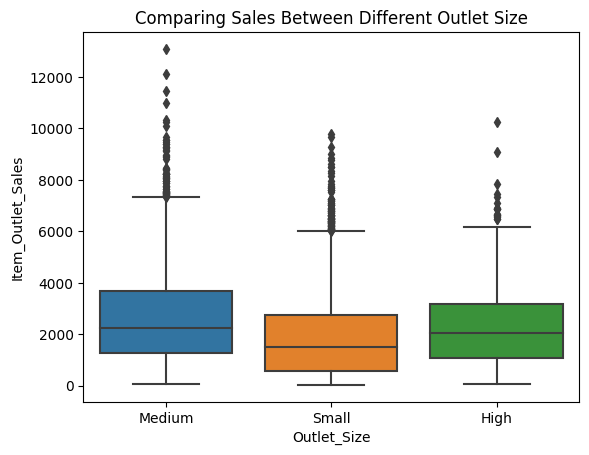

In [ ]:
#ax = sns.boxplot(x='diagnosis', y='area_mean', data=df)
#ax.set_title("Comparing  Area of Benign vs Malignant Tumors");

ax = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Sales Between Different Outlet Size");


####2). Multisubplots betweeb Item_MRP, Outlet_size and Item_Outlet_Sales.

In [ ]:
small_filter = df['Outlet_Size'] == "Small"
df_small = df.loc[small_filter]

med_filter = df['Outlet_Size'] == "Medium"
df_med = df.loc[med_filter]

high_filter = df['Outlet_Size'] == "High"
df_high = df.loc[high_filter]

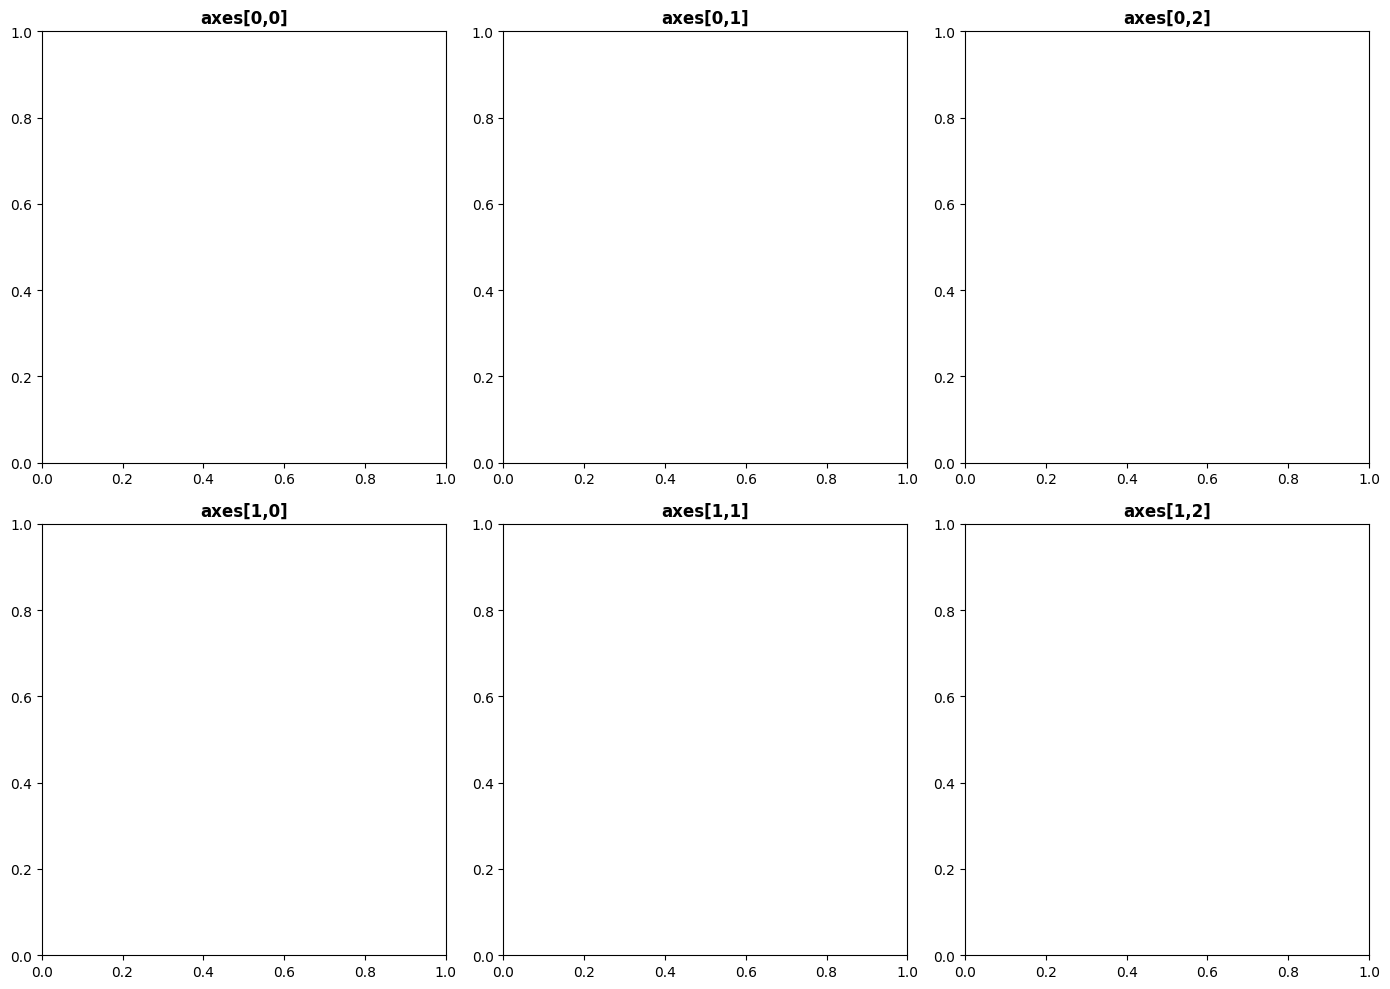

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,10))
# Adding titles to the top row 
axes[0,0].set_title("axes[0,0]", fontweight="bold")
axes[0,1].set_title("axes[0,1]", fontweight="bold")
axes[0,2].set_title("axes[0,2]", fontweight="bold")
## Adding titles to the bottom row
axes[1,0].set_title("axes[1,0]", fontweight="bold")
axes[1,1].set_title("axes[1,1]", fontweight="bold");
axes[1,2].set_title("axes[1,2]", fontweight="bold");
fig.tight_layout()

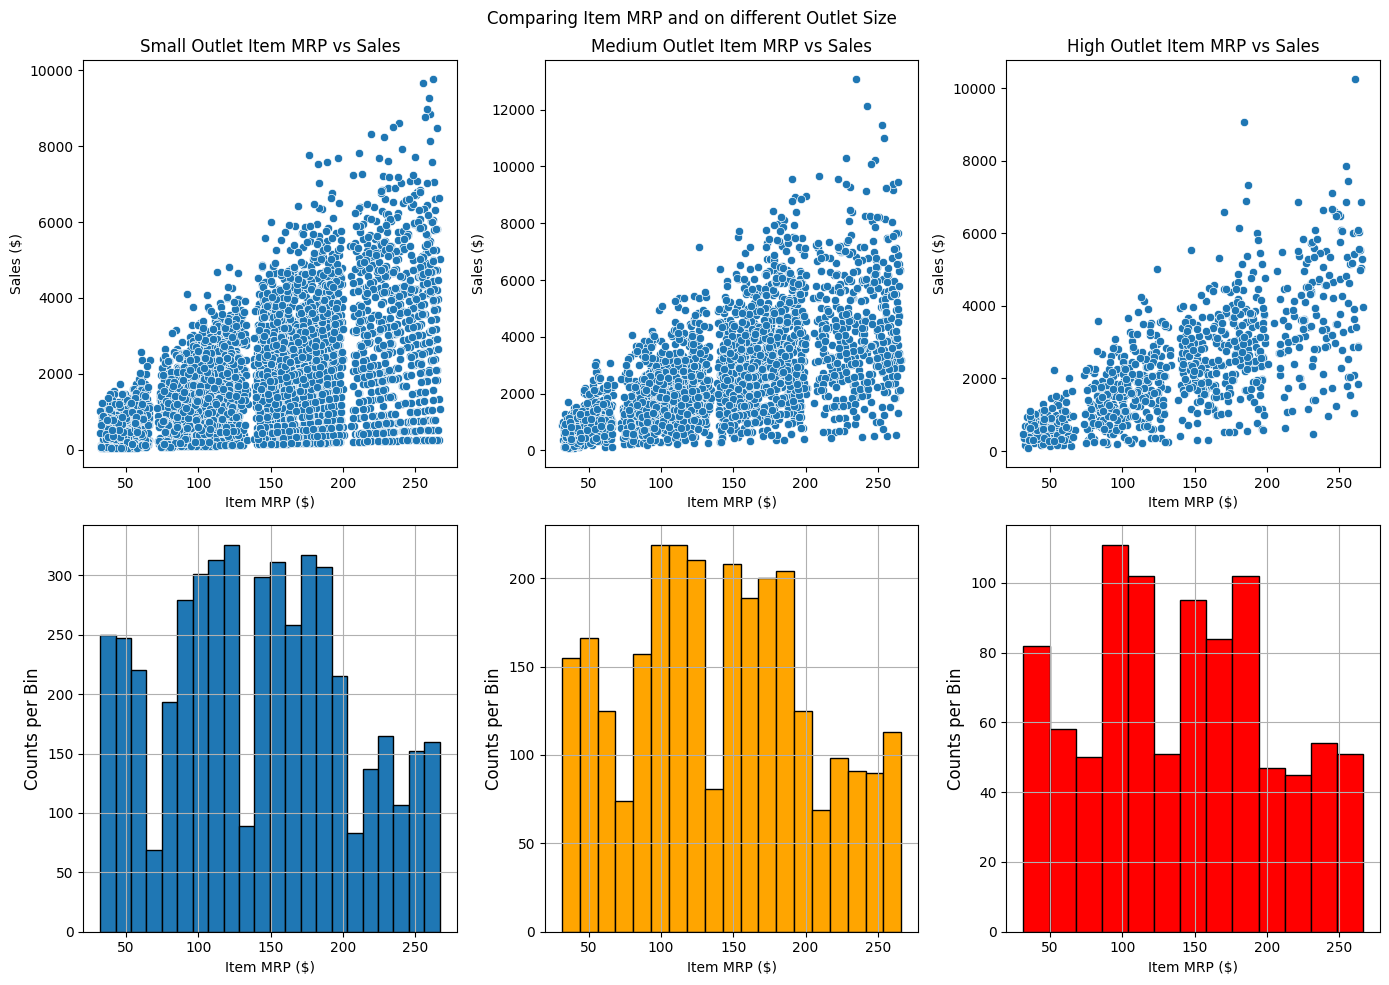

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,10))
## Plotting small data
# Subplot 0,0 (top-left)
sns.scatterplot(data=df_small, x='Item_MRP', y='Item_Outlet_Sales', ax=axes[0,0])
axes[0,0].set_title('Small Outlet Item MRP vs Sales', fontsize = 12)
axes[0,0].set_ylabel("Sales ($)")
axes[0,0].set_xlabel("Item MRP ($)")

# Subplot 1,0 (bottom-left)
df_small['Item_MRP'].hist(bins='auto', edgecolor='black', ax=axes[1,0])
axes[1,0].set_ylabel('Counts per Bin', fontsize = 12);
axes[1,0].set_xlabel("Item MRP ($)")

## Plotting med data
# Subplot 0,1 (middle-right)
sns.scatterplot(data=df_med, x='Item_MRP', y='Item_Outlet_Sales', ax=axes[0,1])
axes[0,1].set_title('Medium Outlet Item MRP vs Sales', fontsize = 12);
axes[0,1].set_ylabel("Sales ($)")
axes[0,1].set_xlabel("Item MRP ($)")
# Subplot 1,1 (middle-right)
df_med['Item_MRP'].hist(bins='auto', edgecolor='black', ax=axes[1,1],
                         color='orange')
axes[1,1].set_ylabel('Counts per Bin', fontsize = 12);
axes[1,1].set_xlabel("Item MRP ($)")

## Plotting high data
# Subplot 0,2 (top-right)
sns.scatterplot(data=df_high, x='Item_MRP', y='Item_Outlet_Sales', ax=axes[0,2])
axes[0,2].set_title('High Outlet Item MRP vs Sales', fontsize = 12);
axes[0,2].set_ylabel("Sales ($)")
axes[0,2].set_xlabel("Item MRP ($)")
# Subplot 1,2 (bottom-right)
df_high['Item_MRP'].hist(bins='auto', edgecolor='black', ax=axes[1,2],
                         color='red')
axes[1,2].set_ylabel('Counts per Bin', fontsize = 12);
axes[1,2].set_xlabel("Item MRP ($)")

## Plotting High data

## Figure title and fixing overlap
fig.suptitle("Comparing Item MRP and on different Outlet Size ");
fig.tight_layout();

## Explanatory Visuals

 The goal of this is to ***help the retailer understand the properties of products and outlets*** that play crucial roles in increasing sales. Your task is to **build several data visualizations** to help your stakeholders better understand trends in the data. 

### What are the top 10 selling item?

In [ ]:
top10sells_df = round(df.groupby('Item_Identifier')['Item_Outlet_Sales'].agg(['sum']).sort_values('sum', ascending = False).head(10),2)
top10sells_df

,sum
Item_Identifier,
FDY55,42661.80
FDA15,41584.54
FDZ20,40185.02
FDF05,36555.75
FDA04,35741.48
FDK03,34843.98
NCQ06,34680.19
NCQ53,34508.41
FDJ55,33531.02


In [ ]:
#this is the time I know the original data was from India therefore currency is Rupee
#from babel.numbers import format_decimal
#format_currency(5433422.8012, 'INR', locale='en_IN')

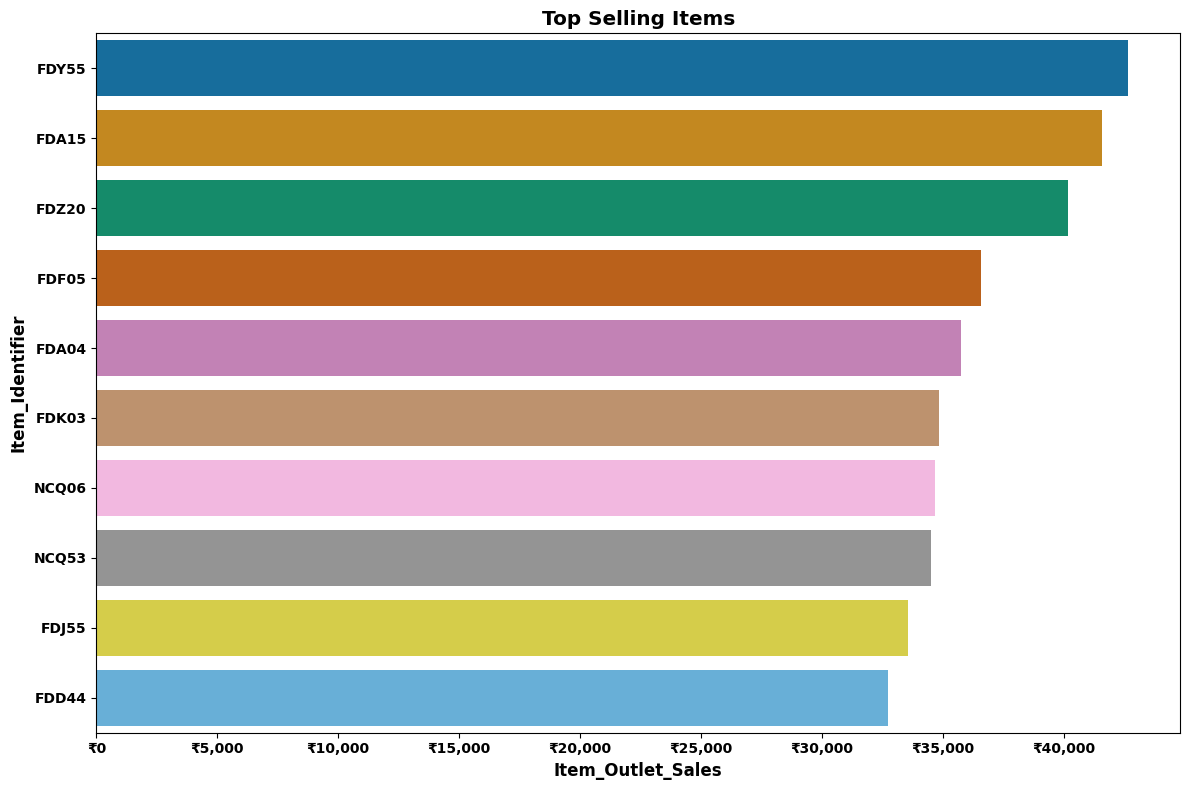

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=top10sells_df,x='sum',y=top10sells_df.index, ax=ax,
                 palette="colorblind")

plt.title('Top Selling Items', fontsize = 'x-large', weight='bold')
plt.xlabel('Item_Outlet_Sales', fontsize = 'large', weight='bold')
plt.ylabel('Item_Identifier', fontsize = 'large', weight='bold');
plt.xticks(fontsize = "medium", weight='semibold')
plt.yticks(fontsize = "medium", weight='semibold');
ax.xaxis.set_major_formatter(price_fmt)
plt.tight_layout()
plt.show;

Data above suggests top 10 item sales whilst Item Identifier FDY55, FDA15 and FDZ20 are the three best selling items of all.

### Does outlet type affect sales?

In [ ]:
df['Outlet_Type'].value_counts(normalize=True).round(2)

Supermarket Type1    0.65
Grocery Store        0.13
Supermarket Type3    0.11
Supermarket Type2    0.11
Name: Outlet_Type, dtype: float64

In [ ]:
#similiar strategy from previous question
topsalesoutlet_df = round(df.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['sum']).sort_values('sum', ascending = False).head(10),2)
topsalesoutlet_df

,sum
Outlet_Type,
Supermarket Type1,12917342.26
Supermarket Type3,3453926.05
Supermarket Type2,1851822.83
Grocery Store,368034.27


In [ ]:
def million_format(x, pos):
  return '{:.0f}M'.format(x/1000000)

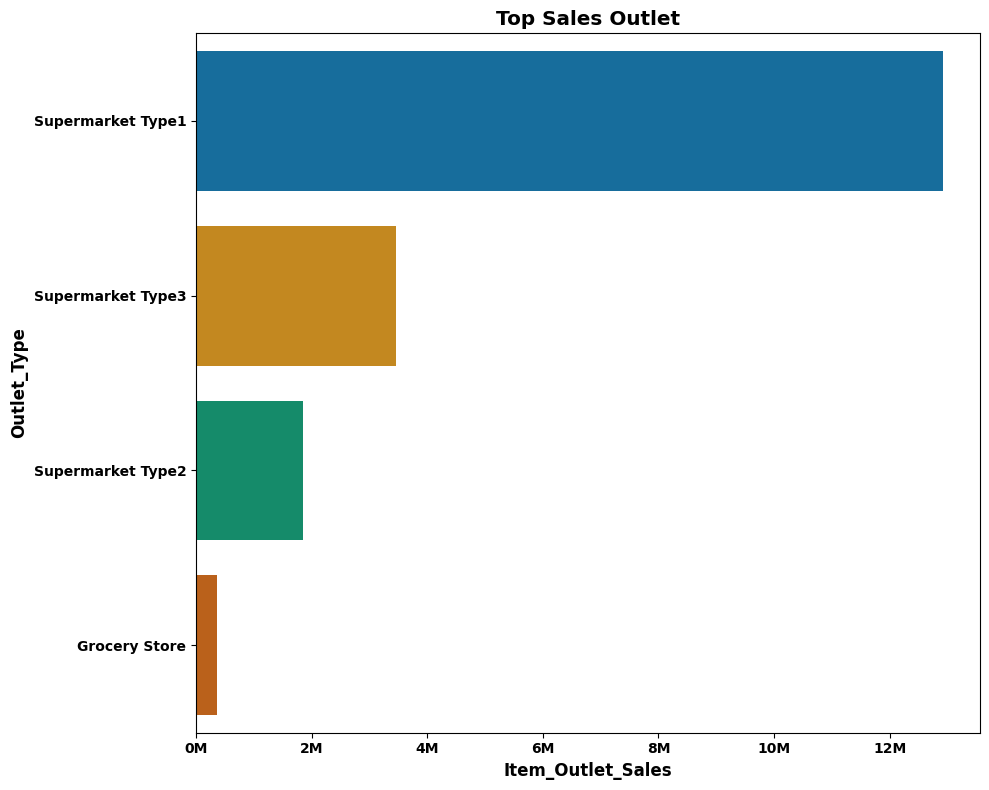

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=topsalesoutlet_df,x='sum',y=topsalesoutlet_df.index, ax=ax,
                 palette="colorblind")

plt.title('Top Sales Outlet', fontsize = 'x-large', weight='bold')
plt.xlabel('Item_Outlet_Sales', fontsize = 'large', weight='bold')
plt.ylabel('Outlet_Type', fontsize = 'large', weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');

# apply formatter to x-axis
ax.xaxis.set_major_formatter(million_format)
plt.tight_layout()
plt.show;

Yes, fro, the visulization data above, different size of outlets does affect sales. Supermarket Type 1 has the most sales whilst Grocery stores with the least

### Does where the item locate affect sales?

In [ ]:
def thousand_format(x, pos):
  return '{:.0f}K'.format(x/1000)

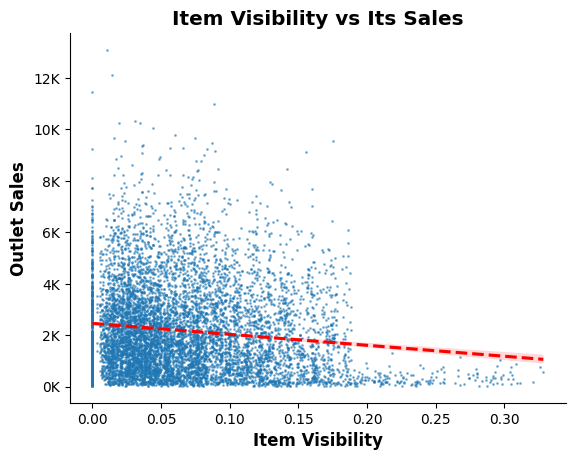

In [ ]:
sns.regplot(data = df, y = 'Item_Outlet_Sales', x= "Item_Visibility",
            scatter_kws={'alpha': 0.5,
                         "s": 1},
            line_kws = {'color':'red', 'linestyle':'--'});

plt.title('Item Visibility vs Its Sales', fontsize = 'x-large', weight='bold')
plt.xlabel('Item Visibility', fontsize = 'large', weight='bold')
plt.ylabel('Outlet Sales', fontsize = 'large', weight='bold');

plt.gca().yaxis.set_major_formatter(thousand_format)
sns.despine()

In [ ]:
from scipy import stats
stats.pearsonr(df['Item_Visibility'], df['Item_Outlet_Sales'])

PearsonRResult(statistic=-0.12862461222077026, pvalue=9.041287179920723e-33)

pesrsonr function was studied from [a python tutorial material from Simon Fraser University in Canada](https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html). 
Results above suggest there is negative correlation with -.13 r value between Item_Outlet_Sales and Item_Visibility. It can also be concluded that there is very limit relationship whilst comparing these two.

# Preprocessing for Mahcine Learning

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
filename = "/content/5-sales_predictions.csv"
df2 = pd.read_csv(filename)
df2 = df2.drop(columns = ['Item_Identifier'])
df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


##Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)

In [4]:
#drop duplicates
df2.duplicated().sum()
#no duplicates

0

In [5]:
#fix inconsistencies
## find them!
for col in df2:
  print(f'column = {col}')
  print(df2[col].value_counts(dropna=False))
  print('\n\n')
#for column in df.select_dtypes(include = 'object'):
  #print(f"{column} value counts: \n{df[column].value_counts()}\n")

column = Item_Weight
NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64



column = Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



column = Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64



column = Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks      

In [6]:
##fix fat content
df2.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat':'Low Fat'}, inplace=True)
df2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

In [7]:
#Identify the features (X) and target (y)
X = df2.drop('Item_Outlet_Sales', axis=1)
y = df2['Item_Outlet_Sales']

## Perform a train test split

In [8]:
#Validation Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##Create a preprocessing object to prepare the dataset for Machine Learning


In [9]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough', verbose_feature_names_out=False)
preprocessor

# transform data
#We fit the ColumnTransformer, which we called 'preprocessor' on the training data. 
#Never on testing data!

#fit on train
preprocessor.fit(X_train)

# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# get column names
cols = preprocessor.get_feature_names_out()

#View the transformations 
X_train_df = pd.DataFrame(X_train_processed, columns=cols)
X_test_df = pd.DataFrame(X_test_processed, columns=cols)
X_test_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,3.310089e-01,-0.776646,-0.998816,-1.293807,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.179892e+00,0.100317,-1.585194,-0.102145,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.784469e-01,-0.482994,-1.595784,0.136187,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.213344e-16,-0.415440,0.506592,-1.532139,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-6.426567e-01,-1.047426,0.886725,0.732018,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,1.113736e+00,-1.134688,0.473646,-1.293807,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2127,-6.426567e-01,-1.291052,0.018124,1.089517,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2128,-1.139570e+00,1.218324,1.093980,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2129,-1.497727e+00,-0.778096,-0.366800,0.136187,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
X_test_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,...,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0
mean,-0.04,0.01,-0.06,-0.01,0.65,0.35,0.08,0.04,0.01,0.08,...,0.11,0.60,0.28,0.30,0.32,0.38,0.13,0.66,0.11,0.1
std,1.01,1.04,0.98,0.99,0.48,0.48,0.27,0.19,0.11,0.27,...,0.32,0.49,0.45,0.46,0.47,0.49,0.34,0.47,0.31,0.3
min,-1.97,-1.29,-1.75,-1.53,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,-0.89,-0.76,-0.78,-1.29,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,0.00,-0.24,-0.15,0.14,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0
75%,0.73,0.56,0.64,0.73,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.0
max,2.00,4.79,1.99,1.33,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0


## Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

In [11]:
# Check for missing values and that data is scaled and one-hot encoded
X_train_df.info()
print('\n')
X_test_df.info()
print('\n')
X_train_df.shape
print('\n')
X_test_df.shape
print('\n')
display(X_train_df.head().round(2))
X_test_df.head().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      6392 non-null   float64
 1   Item_Visibility                  6392 non-null   float64
 2   Item_MRP                         6392 non-null   float64
 3   Outlet_Establishment_Year        6392 non-null   float64
 4   Item_Fat_Content_Low Fat         6392 non-null   float64
 5   Item_Fat_Content_Regular         6392 non-null   float64
 6   Item_Type_Baking Goods           6392 non-null   float64
 7   Item_Type_Breads                 6392 non-null   float64
 8   Item_Type_Breakfast              6392 non-null   float64
 9   Item_Type_Canned                 6392 non-null   float64
 10  Item_Type_Dairy                  6392 non-null   float64
 11  Item_Type_Frozen Foods           6392 non-null   float64
 12  Item_Type_Fruits and

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.82,-0.71,1.83,1.33,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.56,-1.29,0.60,1.33,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.13,1.81,0.24,0.14,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.17,-1.00,-0.95,0.73,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.53,-0.97,-0.34,0.49,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.33,-0.78,-1.00,-1.29,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.18,0.10,-1.59,-0.10,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.38,-0.48,-1.60,0.14,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.00,-0.42,0.51,-1.53,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.64,-1.05,0.89,0.73,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#Machine Learning Predictions

The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.

Dropped the 'Item_Identifier' column due to high cardinality, (1559 is a high number of unique labels or classes) prior to prediction. High cardinality will create a very sparse dataset when it is One Hot Encoded, which can negatively impact the models' metrics, and greatly increase processing times.

In [12]:
#import more libs
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

## Build a linear regression model to predict sales

### Build a linear regression model.

In [13]:
#Instantiate and Fit the Model
lin_reg=LinearRegression()

#scale pipeline
lin_reg_pipe=make_pipeline(preprocessor, lin_reg)

#fit pipeline
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2940361880>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2940361b20>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [14]:
#oredict target value for both training and testing sets
lin_reg_pipe_train_preds = lin_reg_pipe.predict(X_train)
lin_reg_pipe_test_preds = lin_reg_pipe.predict(X_test)

In [15]:
## Create a custom function to evaluate model metrics
def evaluate_model(true,pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    print(f' MAE: {mae}, \n MSE: {mse}, \n RMSE: {rmse:}, \n R2: {r2}')

### Evaluate the performance of your model based on MAE, MSE, RMSE and R^2

In [16]:
print('Train Evaluation')
evaluate_model(y_train, lin_reg_pipe_train_preds)
print('\nTest Evaluation')
evaluate_model(y_test, lin_reg_pipe_test_preds)

Train Evaluation
 MAE: 847.1280212961515, 
 MSE: 1297558.183366949, 
 RMSE: 1139.1041143666143, 
 R2: 0.5615551260381082

Test Evaluation
 MAE: 804.1180898639136, 
 MSE: 1194347.6142922747, 
 RMSE: 1092.8621204398453, 
 R2: 0.5671049487900051


## Build regression tree models to predict sales

### Build a decision tree model

In [17]:
#decide to apply bagged tree model
#make an model instance
dec_tree = DecisionTreeRegressor(random_state = 42)

#add ColumnTransformer and decision Tree Model into a pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

#fit the model w/ training data
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2940361880>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2940361b20>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [18]:
#Create Model Predictions for Training and Testing Data
dt_train_pred = dec_tree_pipe.predict(X_train)
dt_test_pred = dec_tree_pipe.predict(X_test)

### Evaluate the performance of decision tree model based on MAE, MSE, RMSE and R^2

In [19]:
print('Train Evaluation')
evaluate_model(y_train, dt_train_pred)
print('\nTest Evaluation')
evaluate_model(y_test, dt_test_pred)

Train Evaluation
 MAE: 1.6007220580327663e-16, 
 MSE: 3.0330171474830394e-29, 
 RMSE: 5.50728349323243e-15, 
 R2: 1.0

Test Evaluation
 MAE: 1044.9982510558423, 
 MSE: 2251075.1648917384, 
 RMSE: 1500.3583454934153, 
 R2: 0.18409072273251326


R2 on train model =1, it suggests overfitting so decide to tune the model to give a netter r2 on test model

### Tune decision tree

In [20]:
# What was the depth of our default tree?
dec_tree.get_depth()

40

In [21]:
#try loop through 2 and 40 and see which depth would give the best score
depths= list(range(2, 40))
scores = pd.DataFrame(index=depths, columns=["Test Score","Train Score"])

for depth in depths:
  dec_tree=DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
  dec_tree_pipe.fit(X_train, y_train)
  train_score=dec_tree_pipe.score(X_train, y_train)
  test_score=dec_tree_pipe.score(X_test, y_test)
  scores.loc[depth, "Train Score"] = train_score
  scores.loc[depth, "Test Score"] = test_score


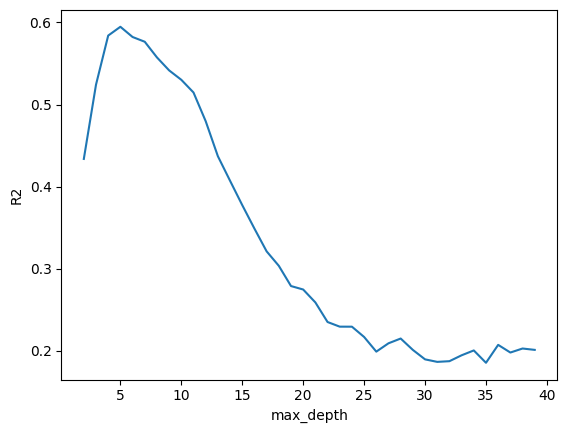

In [22]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [23]:
#sort to see which max_depth gives best score
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.59471,0.60394
4,0.584005,0.582625
6,0.582274,0.615161
7,0.576476,0.626843
8,0.557416,0.643832


In [24]:
## Get final scores for best model
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5_pipe = make_pipeline(preprocessor, dec_tree_5)
dec_tree_5_pipe.fit(X_train, y_train)
train_5_score = dec_tree_5_pipe.score(X_train, y_train)
test_5_score = dec_tree_5_pipe.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.6039397477322956
0.5947099753159972


In [25]:
dec_tree_5_train_pred = dec_tree_5_pipe.predict(X_train)
dec_tree_5_test_pred = dec_tree_5_pipe.predict(X_test)

In [26]:
#get tuned metrics of decision tree
print('Train Evaluation')
evaluate_model(y_train, dec_tree_5_train_pred)
print('\nTest Evaluation')
evaluate_model(y_test, dec_tree_5_test_pred)

Train Evaluation
 MAE: 762.6101695559577, 
 MSE: 1172122.7729098853, 
 RMSE: 1082.6461900869947, 
 R2: 0.6039397477322956

Test Evaluation
 MAE: 738.3173097797824, 
 MSE: 1118185.973077762, 
 RMSE: 1057.4431299496734, 
 R2: 0.5947099753159972


###Build a bagged tree model

In [27]:
#make an model instance
bagreg = BaggingRegressor(random_state = 42)

#place ColumnTransformer and Regression Tree Model into a pipeline
bagreg_pipe = make_pipeline(preprocessor, bagreg)

#fit the model w/ training data
bagreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2940361880>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2940361b20>)],
                                   verbose_feature_names_out=False)),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [28]:
#Create Model Predictions for Training and Testing Data
bt_train_pred = bagreg_pipe.predict(X_train)
bt_test_pred = bagreg_pipe.predict(X_test)

### Evaluate the performance of bagged tree model based on MAE, MSE, RMSE and R^2

In [29]:
print('Train Evaluation')
evaluate_model(y_train, bt_train_pred)
print('\nTest Evaluation')
evaluate_model(y_test, bt_test_pred)

Train Evaluation
 MAE: 319.5451061138924, 
 MSE: 242224.5048546436, 
 RMSE: 492.1630876596127, 
 R2: 0.9181523465669192

Test Evaluation
 MAE: 780.5926369497888, 
 MSE: 1281046.6162421494, 
 RMSE: 1131.8332987865967, 
 R2: 0.5356806227061904


###Tune bagged tree

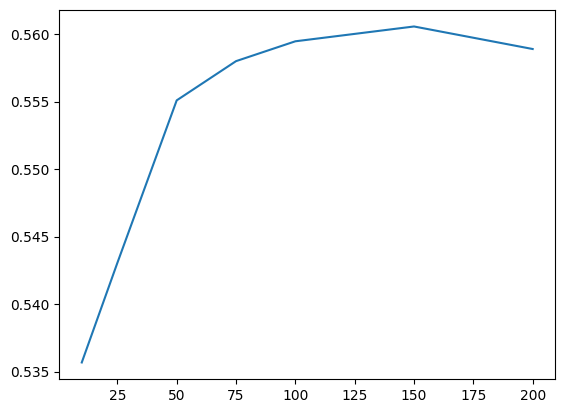

In [30]:
#list of estimator values
estimators = [10, 25, 50, 75, 100, 150, 200]
#dataframe to store scores
scores = pd.DataFrame(index=estimators, columns=["Train Score", "Test Score"])

# Iterate through the values to find the best number of estimators
for num_estimators in estimators:
   bagreg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bagreg_pipe = make_pipeline(preprocessor, bagreg)
   bagreg_pipe.fit(X_train, y_train)
   train_score = bagreg_pipe.score(X_train, y_train)
   test_score = bagreg_pipe.score(X_test, y_test)
   scores.loc[num_estimators, 'Train Score'] = train_score
   scores.loc[num_estimators, 'Test Score'] = test_score

#plot the score
plt.plot(scores['Test Score'])
plt.show()

In [31]:
#sort the scores dataframe by 'Test Score' and retrieve the best value for 'n_estimators'
scores = scores.sort_values(by='Test Score', ascending=False)
scores

,Train Score,Test Score
150,0.938958,0.560564
100,0.938088,0.559467
200,0.939448,0.558895
75,0.937162,0.557997
50,0.935388,0.555092
25,0.930286,0.543056
10,0.918152,0.535681


In [32]:
# Save the index value of the best test score.
best_n_estimators = scores.index[0]
# Instantiate and fit the best version of the model
bagreg_tuned = BaggingRegressor(n_estimators=best_n_estimators,)
bagreg_tuned_pipe = make_pipeline(preprocessor, bagreg_tuned)
bagreg_tuned_pipe.fit(X_train, y_train)
# Evaluate the model
print(bagreg_tuned_pipe.score(X_train, y_train))
print(bagreg_tuned_pipe.score(X_test, y_test))

0.938583127166442
0.5575677444041203


In [33]:
bagreg_tuned_train_pred = bagreg_tuned_pipe.predict(X_train)
bagreg_tuned_test_pred = bagreg_tuned_pipe.predict(X_test)

#get tuned metrics of decision tree
print('Train Evaluation')
evaluate_model(y_train, bagreg_tuned_train_pred)
print('\nTest Evaluation')
evaluate_model(y_test, bagreg_tuned_test_pred)

Train Evaluation
 MAE: 296.23103166833545, 
 MSE: 181760.51466145532, 
 RMSE: 426.3338066133805, 
 R2: 0.938583127166442

Test Evaluation
 MAE: 768.6468873011105, 
 MSE: 1220660.5445821006, 
 RMSE: 1104.8350757385017, 
 R2: 0.5575677444041203


## Determine which model to implement

| Model | R^2 Training Score | R^2 Test Score | RMSE Training Score | RMSE Test Score |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| Linear Regresion | 0.562 | 0.567 | 1139.104 | 1092.862 |
| Decision Tree | 0.604 | 0.595 | 1082.647 | 1057.443  |
| Bagged Tree | 0.939 | 0.557 | 424.609 | 1106.054  |

### Overall, which model do you recommend?Justify your recommendation.

- All three models generate similiar R2 test score but Decision tree has the highest.

- All three models generate similiar RMSE test score but Decision tree has the lowest.

- From conclusions above, I would recommend to use decision tree model.